In [2]:
import pandas as pd
import numpy as np
import os 
from collections import Counter
from datetime import datetime as dt
np.random.seed(42) 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
pwd

'C:\\Users\\SAMSUNG'

In [4]:
data = [] 
data = pd.read_csv("USvideos.csv", error_bad_lines = False)
dataset = []
dataset = pd.read_json('US_category_id.json') 


data['percent_like'] = data.likes / (data.likes + data.dislikes)

In [5]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,percent_like
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.940521
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.938550
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.985181


In [6]:
data.info() #Here we can found out description has less null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
percent_like              40779 non-null float64
dtypes: bool(3), float64(1), int64(5), object(8)
memory usage: 4.5+ MB


In [7]:
data.describe()

,category_id,views,likes,dislikes,comment_count,percent_like
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40779.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,0.933113
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.102317
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,0.930331
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.966988
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,0.982790
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,1.000000


In [8]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'percent_like'],
      dtype='object')

In [9]:
print("Now, let's examine the feature of U.S Video by statistical bar chart.", data.shape)

Now, let's examine the feature of U.S Video by statistical bar chart. (40949, 17)


In [10]:
US_columns = data.groupby('channel_title')['likes','views','dislikes','comment_count'].aggregate('sum').reset_index()
US_columns = US_columns.sort_values(['likes','views','dislikes','comment_count'], ascending=False) #sort descending order
US_columns.head(15) # show first 15 values

,channel_title,likes,views,dislikes,comment_count
2094,ibighit,199247121,2235906679,3467306,31817464
358,ChildishGambinoVEVO,96700818,3758488765,6054434,10151289
541,Dude Perfect,60275557,1870085178,1501477,4009163
1129,Marvel Entertainment,55873344,1808998971,1031250,6453560
110,ArianaGrandeVevo,52170970,1576959172,1931230,4295333
2112,jypentertainment,44900910,1486972132,2482131,7575510
1702,TaylorSwiftVEVO,39292840,1010955662,2127542,3352611
561,Ed Sheeran,39279211,1032288961,769501,1950501
2015,ZaynVEVO,31695245,838561451,777336,2144996
1054,Logan Paul Vlogs,31545290,484356303,13847251,14870370


In [11]:
%matplotlib inline  # We cannot use this because there should be each columns respect to each channel;
import matplotlib.pyplot as plt
US_columns.hist(bins = 50, figsize=(20,15))
plt.show()

UsageError: unrecognized arguments: # We cannot use this because there should be each columns respect to each channel;


In [12]:
USchannels_likes = data.groupby('channel_title')['likes'].aggregate('sum').reset_index()
USchannels_likes = USchannels_likes.sort_values('likes', ascending=False)
USchannels_likes.head(20)

,channel_title,likes
2094,ibighit,199247121
358,ChildishGambinoVEVO,96700818
541,Dude Perfect,60275557
1129,Marvel Entertainment,55873344
110,ArianaGrandeVevo,52170970
2112,jypentertainment,44900910
1702,TaylorSwiftVEVO,39292840
561,Ed Sheeran,39279211
2015,ZaynVEVO,31695245
1054,Logan Paul Vlogs,31545290


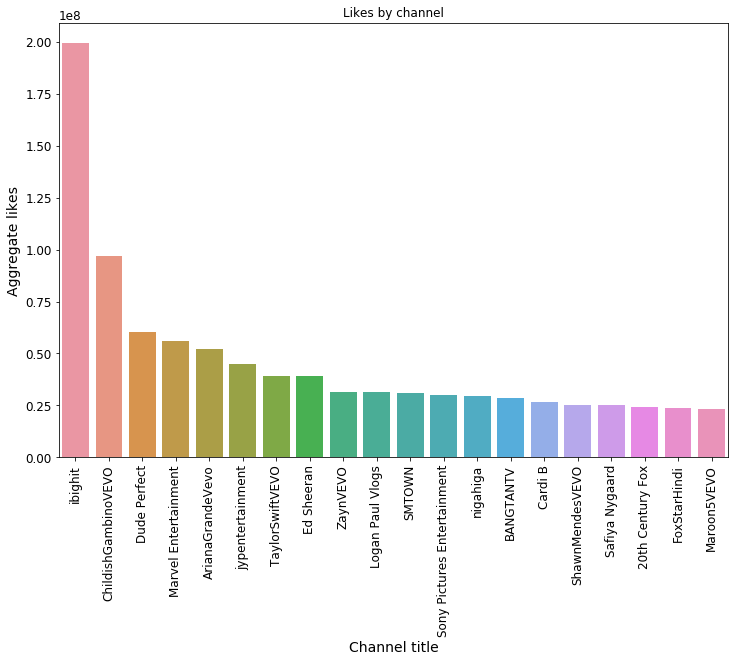

In [13]:
import seaborn as sns
color = sns.color_palette()
plt.figure(figsize=(12,8))
sns.barplot(USchannels_likes.channel_title.head(20), USchannels_likes.likes.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate likes')
plt.title('Likes by channel')
plt.xticks(rotation='vertical')
plt.show()

In [14]:
USchannels_views = data.groupby('channel_title')['views'].aggregate('sum').reset_index()
USchannels_views = USchannels_views.sort_values('views',ascending=False)
USchannels_views.head(20)

,channel_title,views
358,ChildishGambinoVEVO,3758488765
2094,ibighit,2235906679
541,Dude Perfect,1870085178
1129,Marvel Entertainment,1808998971
110,ArianaGrandeVevo,1576959172
1107,MalumaVEVO,1551515831
2112,jypentertainment,1486972132
1614,Sony Pictures Entertainment,1432374398
650,FoxStarHindi,1238609854
177,BeckyGVEVO,1182971286


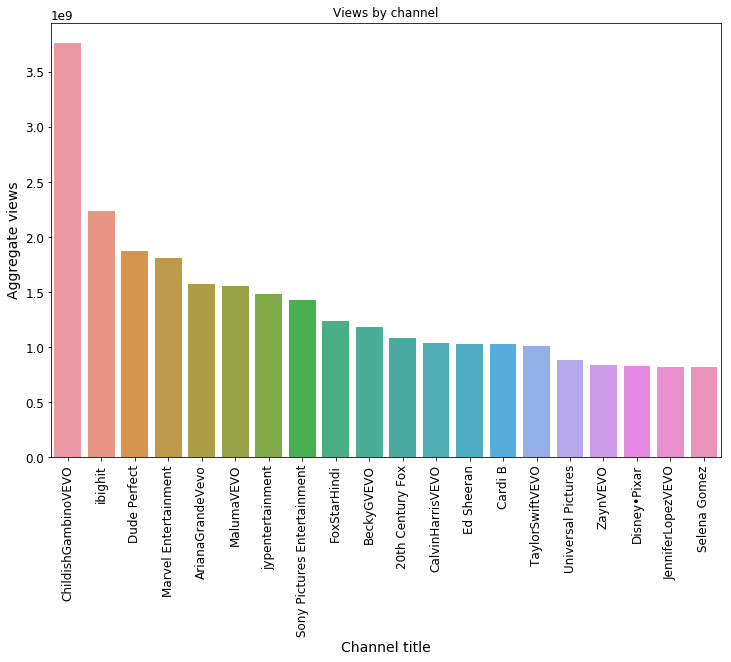

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(USchannels_views.channel_title.head(20), USchannels_views.views.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate views')
plt.title('Views by channel')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
USchannels_dislikes = data.groupby('channel_title')['dislikes'].aggregate('sum').reset_index()
USchannels_dislikes = USchannels_dislikes.sort_values('dislikes',ascending=False)
USchannels_dislikes.head(20)

,channel_title,dislikes
1054,Logan Paul Vlogs,13847251
2010,YouTube Spotlight,10924092
358,ChildishGambinoVEVO,6054434
307,Call of Duty,5644083
2094,ibighit,3467306
2112,jypentertainment,2482131
1702,TaylorSwiftVEVO,2127542
110,ArianaGrandeVevo,1931230
1107,MalumaVEVO,1757948
946,KatyPerryVEVO,1669622


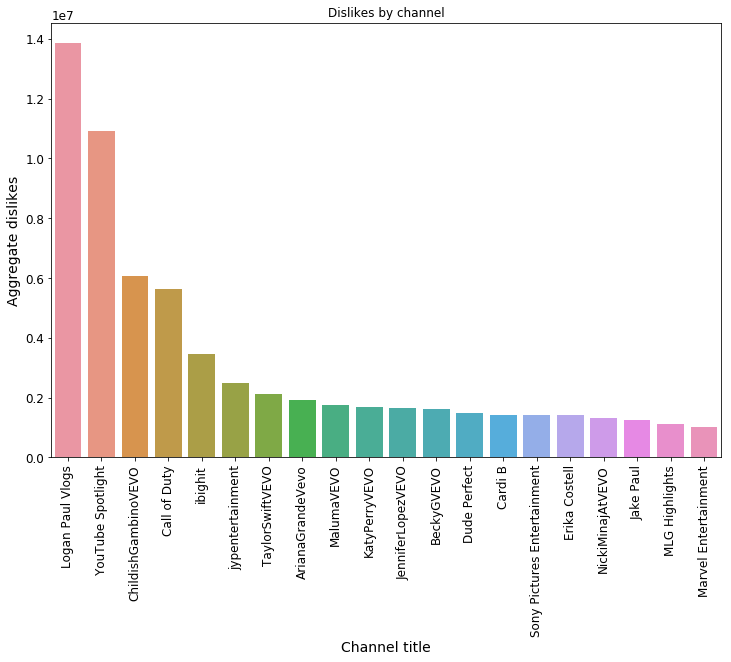

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(USchannels_dislikes.channel_title.head(20), USchannels_dislikes.dislikes.head(20))
plt.xlabel('Channel title')
plt.ylabel('Aggregate dislikes')
plt.title('Dislikes by channel')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
#by checking histogram, we cold check what should be fixed for good data
#Next Step is to make a testset. 

In [24]:
np.random.seed(42)

In [25]:
import numpy as np
# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [26]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

32760 train + 8189 test


In [27]:
corr_matrix = data.corr()

In [28]:
corr_matrix["views"].sort_values(ascending = False)

views                     1.000000
likes                     0.849177
comment_count             0.617621
dislikes                  0.472213
percent_like              0.026428
ratings_disabled          0.015355
comments_disabled         0.002677
video_error_or_removed   -0.002256
category_id              -0.168231
Name: views, dtype: float64

In [29]:
# As we can see, views are very likely relate to number of likes. 
corr_matrix['dislikes'].sort_values(ascending = False)

dislikes                  1.000000
comment_count             0.700184
views                     0.472213
likes                     0.447186
video_error_or_removed   -0.001853
comments_disabled        -0.004431
ratings_disabled         -0.008230
category_id              -0.033547
percent_like             -0.127597
Name: dislikes, dtype: float64

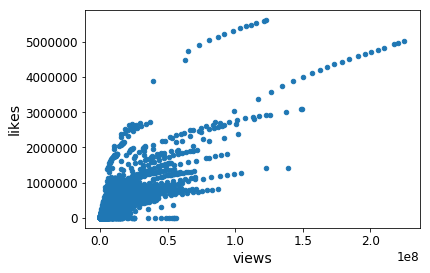

In [35]:
#Also, here we can check dislikes are also relate to number of comments.
#Let's make it visually. 
data.plot(kind = "scatter", y = 'likes', x = 'views', alpha = 1)

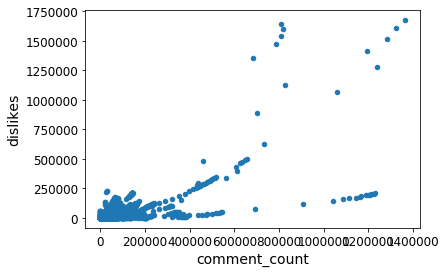

In [39]:
data.plot(kind = "scatter", x = 'comment_count', y = 'dislikes', alpha = 1)